# My Ironhack Bootcamp Final Project | Exploring the Flower Girl Dress Market on Etsy  

This is the main data file. For data collection from Etsy, please refer to the separate workbooks step1 and step2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import re
import openpyxl
from openpyxl import Workbook

In [2]:
import statistics
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [4]:
pd.set_option('display.max_columns', 22)

## Importing and checking through our scraped Etsy data

In [5]:
# data1 = pd.read_csv('step2_primary.csv') 
# data1.shape

# step1a = pd.read_csv('step1_white_pink_blue_red_gold.csv') 
# step1b = pd.read_csv('step1_data.csv') 
# step1c = pd.read_csv('step1_bohip_christening_baptism_beige_formal.csv') 
# step1 = pd.concat([step1a,step1b,step1c])

# data2 = pd.read_csv('step2.csv') 
# data2.drop(columns=data2.columns[0], axis=1, inplace=True)
# data2 = pd.merge(step1, data2, on="listing_url")

# data2_add = pd.read_csv('step2_add.csv') 
# data2_add = pd.merge(step1, data2_add, on="listing_url")

# data2_add2 = pd.read_csv('Nic_scrappes_3.csv') 
# data2_add2.drop(columns=data2_add2.columns[0], axis=1, inplace=True)
# data2_add2 = pd.merge(step1, data2_add2, on="listing_url")

# data = pd.concat([data1,data2,data2_add,data2_add2])

In [6]:
# data.to_csv('step2_final.csv',index=False)

In [7]:
data = pd.read_csv('etsy_data.csv')
data.shape

(11866, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11866 entries, 0 to 11865
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   listing_name                   11866 non-null  object 
 1   listing_url                    11866 non-null  object 
 2   listing_image                  11866 non-null  object 
 3   shop_name                      11866 non-null  object 
 4   size_options                   11866 non-null  int64  
 5   shop_location                  11828 non-null  object 
 6   allows_returns                 11828 non-null  float64
 7   total_shop_sales               11866 non-null  int64  
 8   shop_reviews_count             11866 non-null  int64  
 9   shop_5_star_rating_percentage  11866 non-null  float64
 10  shop_4_star_rating_percentage  11866 non-null  float64
 11  shop_3_star_rating_percentage  11866 non-null  float64
 12  shop_2_star_rating_percentage  11866 non-null 

In [9]:
data.head()

,listing_name,listing_url,listing_image,shop_name,size_options,shop_location,allows_returns,total_shop_sales,shop_reviews_count,shop_5_star_rating_percentage,shop_4_star_rating_percentage,shop_3_star_rating_percentage,shop_2_star_rating_percentage,shop_1_star_rating_percentage,item_reviews_count,listing_customer_reviews,listing_customer_reviews.1,listing_customer_reviews.2,listing_customer_reviews.3,start_price,ship_cost_germany
0,"White flower girl dress, Lace flower girl dres...",https://www.etsy.com/listing/933095128/white-f...,https://i.etsystatic.com/23909643/c/1721/1367/...,BeverlyCoStore,0,Ukraine,0.0,353,84,0.92,0.05,0.02,0.0,0.01,0,N.A.,N.A.,N.A.,N.A.,83.82,52.76
1,"Flower Girl Dress, Wedding, Ivory, Chiffon, Tu...",https://www.etsy.com/listing/1125944983/flower...,https://i.etsystatic.com/14118926/r/il/65855c/...,PetiteLuluStudio,15,Germany,0.0,431,93,0.00,0.00,0.00,0.0,0.00,5,PERFECT!!! Everything is as in the picture all...,"What a magnificent work! The dress is superb, ...",Just like the picture! Love it!,N.A.,60.00,0.00
2,dusty rose flower girl dress baby linen dress,https://www.etsy.com/listing/1209369337/dusty-...,https://i.etsystatic.com/30993712/r/il/562f0e/...,SchoenBoutique,15,Germany,0.0,264,69,0.00,0.00,0.00,0.0,0.00,0,N.A.,N.A.,N.A.,N.A.,68.20,0.00
3,Communion Dress Communion Dress Flower Girl Dress,https://www.etsy.com/listing/779701917/communi...,https://i.etsystatic.com/18224465/c/1319/1048/...,LoliweKids,4,Germany,0.0,8226,1685,0.95,0.03,0.01,0.0,0.00,0,N.A.,N.A.,N.A.,N.A.,95.90,0.00
4,"Flower Girl Dress, Birthday, Pink, Knee-Length...",https://www.etsy.com/listing/679355180/flower-...,https://i.etsystatic.com/14118926/c/1865/1481/...,PetiteLuluStudio,15,Germany,0.0,431,93,0.00,0.00,0.00,0.0,0.00,0,N.A.,N.A.,N.A.,N.A.,75.00,0.00


#### Checking for and removing duplicates

Due to our scraping process and the nature of Etsy with listings repeated across search pages we are bound to have several duplicates which we would need to remove.

In [10]:
# check number of duplicate rows - i.e the number of rows for which values from our 
# subset criteria are identical to a previous entry
data.duplicated(subset=["listing_name","shop_name"]).sum()

0

In [11]:
# to have a closer look, we can examine these duplicate rows using the below:
data.loc[data.duplicated(subset=["listing_name","shop_name"]), :].sort_values("listing_name")

,listing_name,listing_url,listing_image,shop_name,size_options,shop_location,allows_returns,total_shop_sales,shop_reviews_count,shop_5_star_rating_percentage,shop_4_star_rating_percentage,shop_3_star_rating_percentage,shop_2_star_rating_percentage,shop_1_star_rating_percentage,item_reviews_count,listing_customer_reviews,listing_customer_reviews.1,listing_customer_reviews.2,listing_customer_reviews.3,start_price,ship_cost_germany


In [12]:
# we will drop these duplicates to avoid imbalance
data.drop_duplicates(subset=["listing_name","shop_name"],inplace=True)
data=data.reset_index(drop=True)
data.shape

(11866, 21)

#### Checking and treating NaN values 

Looks like we some nan values. Checking the affected listings reveals that the items are delisted, or "sold out" and therefore were unavailable to scrape. In fact none of the other rows were filled with any information, but our failsafe filled them with placeholder values. We will remove the affected columns as they are of no relevance.

In [13]:
# Checking columns with nans
def nan_check(data):
    nans = pd.DataFrame(data.isna().sum()).reset_index()
    nans.columns = ['count', 'val']
    display(nans[nans['val']>0])
    return None

nan_check(data)

,count,val
5,shop_location,38
6,allows_returns,38


In [14]:
# checking the affected rows
data[data.isna().any(axis=1)]

,listing_name,listing_url,listing_image,shop_name,size_options,shop_location,allows_returns,total_shop_sales,shop_reviews_count,shop_5_star_rating_percentage,shop_4_star_rating_percentage,shop_3_star_rating_percentage,shop_2_star_rating_percentage,shop_1_star_rating_percentage,item_reviews_count,listing_customer_reviews,listing_customer_reviews.1,listing_customer_reviews.2,listing_customer_reviews.3,start_price,ship_cost_germany
1499,Beautiful Ladybird Ladybug Cotton Linen Print ...,https://www.etsy.com/listing/776066439/beautif...,https://i.etsystatic.com/12597197/r/il/52627a/...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0
2178,"Yellow girl dress, Yellow headband, Yellow bee...",https://www.etsy.com/listing/596927123/yellow-...,https://i.etsystatic.com/15496805/c/1553/1233/...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0
2437,Age 3 girls puffball pinafore dress and blouse...,https://www.etsy.com/listing/1201108019/age-3-...,https://i.etsystatic.com/34890058/r/il/8308fb/...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0
3487,"Kate gown,lace christening, lace baptism dress...",https://www.etsy.com/listing/570143811/kate-go...,https://i.etsystatic.com/5487470/c/2250/1786/0...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0
3902,"Girls Dress, Pink Girls Dress, Girls Fashion D...",https://www.etsy.com/listing/1171159727/girls-...,https://i.etsystatic.com/33672330/r/il/b60a60/...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0
3916,"Linen baby Girl Dress with Blumer, Communion D...",https://www.etsy.com/listing/1271530961/linen-...,https://i.etsystatic.com/24006093/r/il/c4793a/...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0
4001,"Baby girls tulle tutu dress, toddler kids chil...",https://www.etsy.com/listing/1172987386/baby-g...,https://i.etsystatic.com/33634240/r/il/74a24c/...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0
4162,First birthday baby dress Toddler tulle tutu b...,https://www.etsy.com/listing/1175404027/first-...,https://i.etsystatic.com/27818288/c/1600/1271/...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0
4181,"Smash Cake dress, Navy blue Blush Pink, Baby G...",https://www.etsy.com/listing/1080908332/smash-...,https://i.etsystatic.com/24006093/r/il/b68853/...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0
4707,Kids lehenga choli dupatta Indian designer eth...,https://www.etsy.com/listing/647838523/kids-le...,https://i.etsystatic.com/18092401/c/864/685/0/...,No name,0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,N.A.,N.A.,N.A.,N.A.,0.00,0.0


In [15]:
# pulling up link to one affected listing
data["listing_url"].iloc[1537]

'https://www.etsy.com/listing/591416748/peach-lace-tulle-satin-formal-flower?click_key=775003ad7fea1fe29f8a50e8b1e86ea63e982d6d%3A591416748&click_sum=459a6b78&ga_order=highest_reviews&ga_search_type=all&ga_view_type=gallery&ga_search_query=flower+girl+dress&ref=search_in_grid-198-2&sts=1'

In [16]:
# dropping the affected rows
data = data.dropna().reset_index(drop=True)

In [17]:
data.shape

(11828, 21)

In [18]:
print(data.isnull().sum())

listing_name                     0
listing_url                      0
listing_image                    0
shop_name                        0
size_options                     0
shop_location                    0
allows_returns                   0
total_shop_sales                 0
shop_reviews_count               0
shop_5_star_rating_percentage    0
shop_4_star_rating_percentage    0
shop_3_star_rating_percentage    0
shop_2_star_rating_percentage    0
shop_1_star_rating_percentage    0
item_reviews_count               0
listing_customer_reviews         0
listing_customer_reviews.1       0
listing_customer_reviews.2       0
listing_customer_reviews.3       0
start_price                      0
ship_cost_germany                0
dtype: int64


#### Checking if all are the proper dtype

In [19]:
# checking if all are the proper dtype
data.dtypes

listing_name                      object
listing_url                       object
listing_image                     object
shop_name                         object
size_options                       int64
shop_location                     object
allows_returns                   float64
total_shop_sales                   int64
shop_reviews_count                 int64
shop_5_star_rating_percentage    float64
shop_4_star_rating_percentage    float64
shop_3_star_rating_percentage    float64
shop_2_star_rating_percentage    float64
shop_1_star_rating_percentage    float64
item_reviews_count                 int64
listing_customer_reviews          object
listing_customer_reviews.1        object
listing_customer_reviews.2        object
listing_customer_reviews.3        object
start_price                      float64
ship_cost_germany                float64
dtype: object

In [20]:
# not sure why allows_returns was saved as a float, it is technically an int (1 or 0) and 
# actually a categorical (False/True) - I will first transform to int then to object.

data.allows_returns = data.allows_returns.astype(int)

In [21]:
data.allows_returns = data.allows_returns.astype(object)

#### Cleaning up shop location

We have a lot of values here, as USA shops are split by state. We will merge these under the label USA instead. 

In [22]:
pd.set_option('display.max_rows', 800)

In [23]:
pd.DataFrame(data['shop_location'].value_counts()).reset_index()

,index,shop_location
0,United Kingdom,1379
1,Ukraine,998
2,Germany,854
3,Turkey,604
4,"Feasterville Trevose, PA",379
5,"Dubuque, IA",358
6,Poland,294
7,Australia,280
8,France,254
9,China,239


In [24]:
pd.DataFrame(data['shop_location'].loc[data['shop_location'].str.contains(",", case=False)]).reset_index(drop=True)

,shop_location
0,"Medford, NY"
1,"Feasterville Trevose, PA"
2,"Honolulu, HI"
3,"Feasterville Trevose, PA"
4,"Feasterville Trevose, PA"
...,...
4921,"Feasterville Trevose, PA"
4922,"Grand Rapids, MI"
4923,"El Cajon, CA"
4924,"Hickory, NC"


In [25]:
# There is no value for US - instead only US states. We can pick them out by the "," and 
# replace with USA

data.loc[data['shop_location'].str.contains(','), 'shop_location'] = 'United States'

In [26]:
pd.DataFrame(data['shop_location'].value_counts()).reset_index()

,index,shop_location
0,United States,4988
1,United Kingdom,1379
2,Ukraine,998
3,Germany,854
4,Turkey,604
5,Poland,294
6,Australia,280
7,France,254
8,China,239
9,Lithuania,237


In [27]:
pd.set_option('display.max_rows', 30)

### EDA

#### Removing outlying countries 
After a discussion with our client, we will put an emphasis on the shops from the top five countries by listing.
United States is a very importaint market for our client, about 48% of her orders come from there. 
Germany is our home market and about as importaint as the US. 

There are several outliers far removed from our usual markets which we should eliminate from our data, mainly in Australasia, eastern Europe, Asia (and Asia Pacific), Eurasia, and Africa as we are very unlikely to be competing against them. Doing this we remove a little more than 1000 rows.

We will retain the top regions (US, UK, Ukraine, Germany, Turkey, Poland and France. 
Other European countries off lesser importantce we will merge into "Other".

In [28]:
data.shop_location.unique()

array(['Ukraine', 'Germany', 'United Kingdom', 'Latvia', 'Spain',
       'Poland', 'Romania', 'Lithuania', 'Bulgaria', 'Italy', 'Greece',
       'France', 'United States', 'Moldova', 'Cyprus', 'Turkey',
       'The Netherlands', 'Estonia', 'Portugal', 'Czech Republic',
       'Belgium', 'China', 'Australia', 'Canada', 'Slovakia', 'Thailand',
       'Indonesia', 'Denmark', 'Hong Kong', 'Taiwan', 'South Africa',
       'Israel', 'Singapore', 'Austria', 'India', 'Hungary', 'Vietnam',
       'New Zealand', 'Kazakhstan', 'Uzbekistan', 'Slovenia', 'Sri Lanka',
       'Egypt', 'Ireland', 'Nigeria', 'South Korea', 'Sweden', 'Mexico',
       'Jordan', 'Serbia', 'Honduras', 'Bosnia and Herzegovina',
       'Switzerland', 'Belarus', 'Norway', 'Malaysia', 'Georgia',
       'Armenia', 'Finland'], dtype=object)

In [29]:
# defining a droplist

drop = ['China', 'Australia', 'Canada', 'Thailand','Indonesia', 'Latvia', 'Lithuania',
        'Hong Kong', 'Taiwan', 'South Africa','Israel', 'Singapore', 'Moldova',
        'India', 'Vietnam','New Zealand', 'Kazakhstan', 'Uzbekistan', 'Cyprus',
        'Sri Lanka','Egypt', 'Nigeria', 'South Korea', 'Mexico','Estonia', 'Bosnia and Herzegovina',
        'Jordan', 'Serbia', 'Honduras', 'Malaysia', 'Georgia', 'Armenia', 'Finland', 'Belarus', 
        'Norway']

In [30]:
# data[data.shop_name == "wildthingsdresses"].shape[0]

In [31]:
# dropping rows where country equals our droplist

data = data[data.shop_location.isin(drop) == False]

In [56]:
# replacing country values for the remaining countries, setting a limit of 250, which will include the US, 
# and top 6 of Europe

df = pd.DataFrame(data['shop_location'].value_counts()).reset_index()

df.columns = ['shop_location', 'count']
other_shop_locations = list(df[df['count']<650]['shop_location'])
# other_shop_locations
def clean_shop_location(x):
    if x in other_shop_locations:
        return 'Other'
    else:
        return x
    
data['shop_location'] = list(map(clean_shop_location, data['shop_location']))

In [57]:
pd.DataFrame(data['shop_location'].value_counts()).reset_index()

,index,shop_location
0,United States,4988
1,Other,1869
2,United Kingdom,1379
3,Ukraine,998
4,Germany,854


#### Star_rating_percentage 

These columns are meant to give an out of 5 "star" score but through webscraping we had to import not the score but the percentage count of reviews for each rating. We will replicate this as a shop_rating column

After going through the results, it seems like the scraping here was inconsistent due to the formatting of Etsy's listings differing. We have a lot of shops where the rating percentage was therefore not scraped, making this figure unusable. 

In [34]:
# data.head(5)

In [35]:
# data['shop_rating'] = df.

In [36]:
# 'shop_5_star_rating_percentage',
#  'shop_4_star_rating_percentage',
#  'shop_3_star_rating_percentage',
#  'shop_2_star_rating_percentage',
#  'shop_1_star_rating_percentage',
# 'shop_reviews_count'

In [37]:
# def winning_city(df, rtng, rvws):
#     return round(sum(df[rvws] * df[rtng]) / df[rvws].sum(), 3) 
#     # rounded to 3 decimal places, as otherwise at 2 London/Zurich share a score and London gets alphabetically sorted first

# cities_ranked = cities.groupby('city').apply(winning_city, 'rating', 'reviews')
# cities_ranked = cities_ranked.sort_values(ascending=False).reset_index()
# cities_ranked = cities_ranked.rename(columns={0:"cumulative_score",1:"city"})
# cities_ranked.index += 1 
# cities_ranked


#### Dividing Dataset

Split off listing name, review columns for nlp; Split off listing url for reference; Split off listing image for palette analysis

In [407]:
data_ml = data[['listing_name', 
                'listing_image',
                'listing_customer_reviews', 
                'listing_customer_reviews.1', 
                'listing_customer_reviews.2', 
                'listing_customer_reviews.3']]

data_link = data[['listing_url']]

data_stripped = data.copy()

data_stripped = data_stripped.drop(['listing_name','listing_url','listing_image','listing_customer_reviews','listing_customer_reviews.1','listing_customer_reviews.2','listing_customer_reviews.3','shop_5_star_rating_percentage','shop_4_star_rating_percentage','shop_3_star_rating_percentage','shop_2_star_rating_percentage','shop_1_star_rating_percentage',], axis = 1)

In [39]:
list(data)

['listing_name',
 'listing_url',
 'listing_image',
 'shop_name',
 'size_options',
 'shop_location',
 'allows_returns',
 'total_shop_sales',
 'shop_reviews_count',
 'shop_5_star_rating_percentage',
 'shop_4_star_rating_percentage',
 'shop_3_star_rating_percentage',
 'shop_2_star_rating_percentage',
 'shop_1_star_rating_percentage',
 'item_reviews_count',
 'listing_customer_reviews',
 'listing_customer_reviews.1',
 'listing_customer_reviews.2',
 'listing_customer_reviews.3',
 'start_price',
 'ship_cost_germany']

## First Conclusions

According to our customer, last year (2021) we had 14.4k shop visitors which resulted in 68 sales. 

This year (2022) we so far had 27.8k visits and 165 orders. (post covid effect)

What is the conversion rate?

In [40]:
print("conversion rate 2021:",(68/1440)*100)
print("conversion rate 2022:",(165/2780)*100)

conversion rate 2021: 4.722222222222222
conversion rate 2022: 5.935251798561151


In terms of items sold, which shops are leading on Etsy? Where does our customer rank?

In [219]:
# total number of shops
data['shop_name'].nunique()

1970

In [220]:
pd.set_option('display.max_rows', 50)

In [365]:
# top 10 shops by sales vol
shops_ranked = data.pivot_table(index=['shop_location','shop_name'],values=['total_shop_sales','listing_name','start_price','shop_reviews_count','allows_returns','size_options','ship_cost_germany'], aggfunc = {'total_shop_sales':'mean','listing_name':'count','start_price':'mean','shop_reviews_count':'mean','allows_returns':'max','size_options':'mean','ship_cost_germany':'max'}).reset_index()
df=shops_ranked.sort_values('total_shop_sales',ascending=False).reset_index()

In [366]:
df[df["start_price"] > 40].reset_index()

,level_0,index,shop_location,shop_name,allows_returns,listing_name,ship_cost_germany,shop_reviews_count,size_options,start_price,total_shop_sales
0,0,1804,United States,ThinkPinkBows,0,1,9.44,83038.000000,7.000000,65.300000,75092.000000
1,1,1604,United States,OnceUponATimeTuTus,0,5,26.42,33544.800000,16.000000,54.010000,72275.600000
2,2,1348,United States,HaydenHarlowPR,0,1,50.75,7990.000000,9.000000,248.440000,64404.000000
3,6,1592,United States,NicolettesCouture,1,358,37.01,10779.955307,8.659218,83.652123,43448.650838
4,7,1803,United States,Thelittlekitten23,1,57,28.21,7791.859649,8.877193,77.006842,40711.929825
...,...,...,...,...,...,...,...,...,...,...,...
1205,1977,1007,United Kingdom,StoreEighty9,0,1,8.47,0.000000,7.000000,47.590000,0.000000
1206,1978,1448,United States,Lanavidababyclothes,0,1,16.19,4.000000,3.000000,43.940000,0.000000
1207,1979,333,Other,DumpiBoutique,0,1,15.00,247.000000,6.000000,80.250000,0.000000
1208,1980,1451,United States,LePetitBijouBoutique,1,1,25.78,534.000000,6.000000,54.000000,0.000000


In [367]:
df.head(10)

,index,shop_location,shop_name,allows_returns,listing_name,ship_cost_germany,shop_reviews_count,size_options,start_price,total_shop_sales
0,1804,United States,ThinkPinkBows,0,1,9.44,83038.000000,7.000000,65.300000,75092.000000
1,1604,United States,OnceUponATimeTuTus,0,5,26.42,33544.800000,16.000000,54.010000,72275.600000
2,1348,United States,HaydenHarlowPR,0,1,50.75,7990.000000,9.000000,248.440000,64404.000000
3,1928,United States,littleflowerfabric,0,1,17.08,6525.000000,3.000000,30.830000,62587.000000
4,1720,United States,SimplySublimeBaby,0,1,18.33,9257.000000,8.000000,31.390000,46823.000000
5,1788,United States,TheHappyMailPlace,0,1,17.96,7538.000000,38.000000,12.420000,45676.000000
6,1592,United States,NicolettesCouture,1,358,37.01,10779.955307,8.659218,83.652123,43448.650838
7,1803,United States,Thelittlekitten23,1,57,28.21,7791.859649,8.877193,77.006842,40711.929825
8,1648,United States,PrinteesPlus,0,2,21.14,5147.500000,7.000000,32.400000,35534.000000
9,836,United Kingdom,GagaKidz,1,1,0.00,4133.000000,9.000000,20.180000,31876.000000


In [368]:
# checking position of our client globally.
df.loc[df['shop_name'] == 'PetiteLuluStudio']

,index,shop_location,shop_name,allows_returns,listing_name,ship_cost_germany,shop_reviews_count,size_options,start_price,total_shop_sales
609,158,Germany,PetiteLuluStudio,0,5,0.0,93.4,12.2,72.0,431.0


In [369]:
# removing rows where avg. start price is below 40 EUR. These are unlikely to compete in the same category of 
# quality as our client. 
df = df[df["start_price"] > 40].reset_index()

In [370]:
# resetting indeces and starting from 1 to represent global rank
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.index += 1
df.shape

(1210, 9)

In [371]:
# checking position of our client globally after removing outliers.
df.loc[df['shop_name'] == 'PetiteLuluStudio']

,shop_location,shop_name,allows_returns,listing_name,ship_cost_germany,shop_reviews_count,size_options,start_price,total_shop_sales
381,Germany,PetiteLuluStudio,0,5,0.0,93.4,12.2,72.0,431.0


In [372]:
# set up a german rank list
df_de = df.loc[df['shop_location'] == 'Germany'].reset_index()
df_de.index += 1
df_de.shape

(98, 10)

In [373]:
# checking position of our client for Germany.
df_de.loc[df_de['shop_name'] == 'PetiteLuluStudio']

,index,shop_location,shop_name,allows_returns,listing_name,ship_cost_germany,shop_reviews_count,size_options,start_price,total_shop_sales
27,381,Germany,PetiteLuluStudio,0,5,0.0,93.4,12.2,72.0,431.0


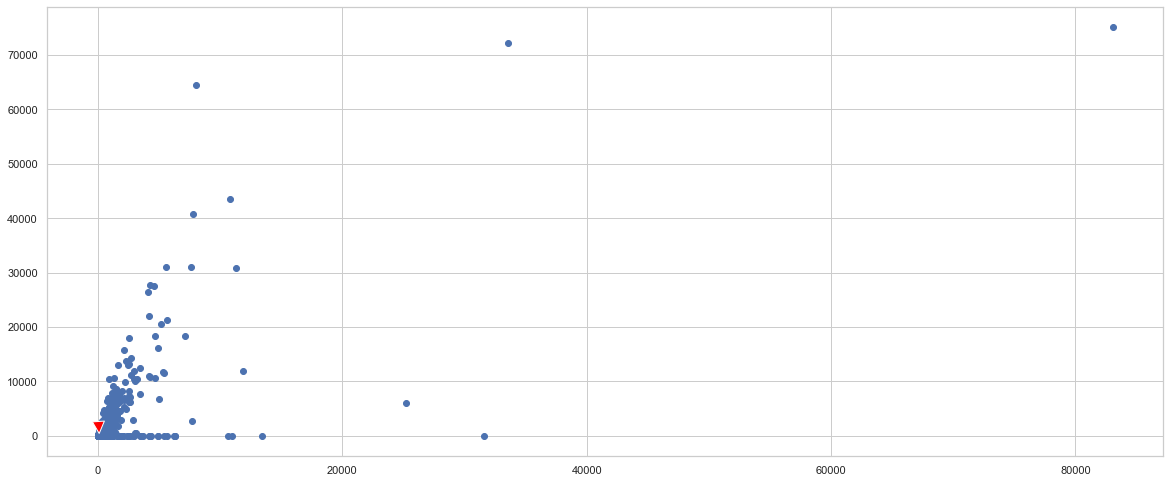

In [374]:
# Basic chart
plt.plot('shop_reviews_count', 'total_shop_sales', data=df,  linestyle='none', marker='o')
sns.set(rc={'figure.figsize':(5,5)})
 
# Annotate with text + Arrow
plt.annotate(
# Label and coordinate
' ', xy=(93, 431), xytext=(90, 900),
 
# Custom arrow
arrowprops=dict(facecolor='red', shrink=0.1))

# Show the graph
plt.show()

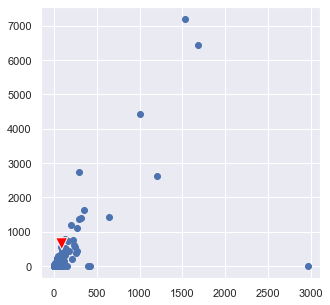

In [375]:
# Basic chart
plt.plot('shop_reviews_count', 'total_shop_sales', data=df_de,  linestyle='none', marker='o')
sns.set(rc={'figure.figsize':(5,5)})
 
# Annotate with text + Arrow
plt.annotate(
# Label and coordinate
' ', xy=(93, 431), xytext=(90, 900),
 
# Custom arrow
arrowprops=dict(facecolor='red', shrink=0.1))

# Show the graph
plt.show()

[Text(0.5, 0, ' ')]

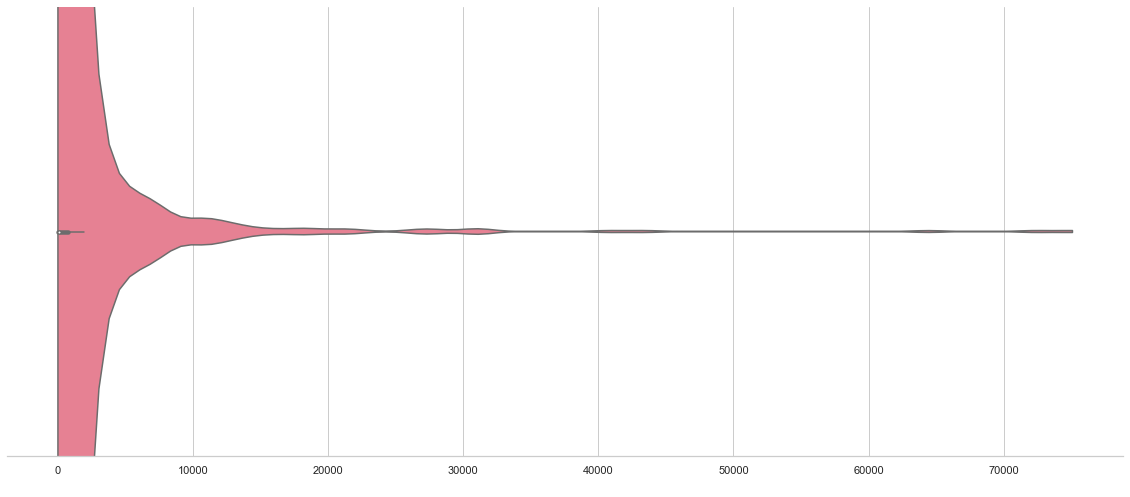

In [376]:
# plot
sns.set(rc={'figure.figsize':(20,8.27)})

sns.set_style("whitegrid")
fig1 = sns.violinplot(x=df['total_shop_sales'], palette="husl", hue=5, scale="count", width=4, cut=0)
sns.despine(left=True)


fig1.set(xlabel = " ")

In [377]:
list(data_ml)

['listing_name',
 'listing_image',
 'listing_customer_reviews',
 'listing_customer_reviews.1',
 'listing_customer_reviews.2',
 'listing_customer_reviews.3']

In [306]:
data_ml.shape

(10088, 6)

In [352]:
df_nlp = data_ml[['listing_customer_reviews', 'listing_customer_reviews.1', 'listing_customer_reviews.2', 'listing_customer_reviews.3']].reset_index(drop=True)
df_nlp=pd.DataFrame(df_nlp.unstack().reset_index())
df_nlp = df_nlp.drop(["level_0","level_1"], axis = 1)
df_nlp.rename(columns={ df_nlp.columns[0]: "reviews" }, inplace = True)
df_nlp.shape

(10088, 4)

In [360]:
df_nlp = df_nlp[df_nlp["reviews"] != "N.A."].reset_index()

In [361]:
df_nlp

,index,reviews
0,1,PERFECT!!! Everything is as in the picture all...
1,6,I ordered this dress for a baptism. Rimma was ...
2,8,"Had already asked before the purchase, how lon..."
3,10,Loved our dresses ! The girls were stunning - ...
4,12,These dresses are everything I could have want...
...,...,...
7573,40214,The most beautiful dress. My daughter looked a...
7574,40245,This dress was beautiful and exactly what I wa...
7575,40251,I imagined the quality of the fabric and workm...
7576,40283,Material is a little sheer


In [296]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/NicolasVollmerMac/nltk_data...


In [298]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [362]:
example = df_nlp[''][50]
print(example)

KeyError: ''

In [ ]:

# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(data_ml.iterrows(), total=len(data_ml)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

## Modeling

In [378]:
df.loc[df['shop_name'] == "PetiteLuluStudio"]

,shop_location,shop_name,allows_returns,listing_name,ship_cost_germany,shop_reviews_count,size_options,start_price,total_shop_sales
381,Germany,PetiteLuluStudio,0,5,0.0,93.4,12.2,72.0,431.0


In [408]:
# removing outliers with total sales over 1000

df_test_1k = data_stripped.loc[data_stripped['total_shop_sales'] < 1000]

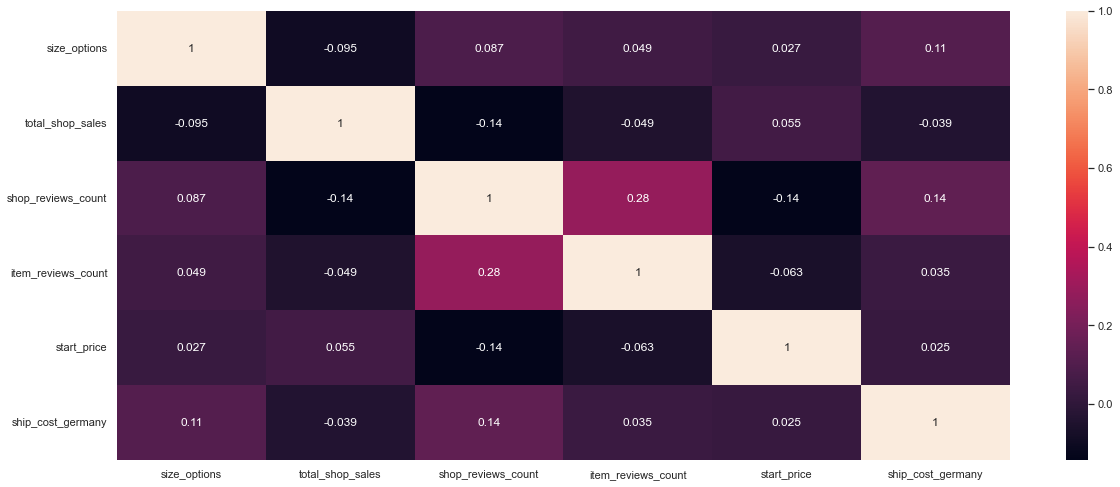

In [409]:
correlations_matrix = df_test_1k.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### Feature Selection

We will use total sales quantity as our target y variable

In [410]:
y = df_test_1k[["total_shop_sales"]]

In [411]:
X = df_test_1k[['size_options','shop_location','allows_returns','shop_reviews_count','item_reviews_count','start_price','ship_cost_germany']]

#### Train Test Split

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [413]:
# split tain and test sets by num and cat vals

X_train_num = X_train.select_dtypes(np.number) 
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat  = X_test.select_dtypes(object)

#### Encoding and Normalising

In [414]:
# MinMax function to normalize continuous columns 
transformer = MinMaxScaler().fit(X_train_num)

X_train_num_scaled = pd.DataFrame(transformer.transform(X_train_num), columns = X_train_num.columns)
X_test_num_scaled = pd.DataFrame(transformer.transform(X_test_num), columns = X_test_num.columns)

In [415]:
# One hot encoding categorical features
def cat_encode(data, _onehotencoder):

    encoded = _onehotencoder.transform(data).toarray()
    cols = _onehotencoder.get_feature_names_out(input_features=data.columns)
    
    # Returning a complete encoded categorical dataset
    return pd.DataFrame(encoded, columns=cols).reset_index(drop=True)

onehotencoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_cat)

X_train_cat_encoded = cat_encode(X_train_cat, onehotencoder).reset_index(drop = True)
X_test_cat_encoded = cat_encode(X_test_cat, onehotencoder).reset_index(drop = True)

In [416]:
# Concatenating the datasets
X_train_scaled = pd.concat([X_train_cat_encoded, X_train_num_scaled], axis = 1)
X_test_scaled = pd.concat([X_test_cat_encoded, X_test_num_scaled], axis = 1)

In [417]:
#reseting y indexes
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [418]:
X_train_scaled.shape

(5501, 10)

In [419]:
X_test_scaled.shape

(1376, 10)

#### Modeling

In [420]:
lm = linear_model.LinearRegression()
lm = lm.fit(X_train_scaled,y_train)
predictions = lm.predict(X_test_scaled)
print('Predictions R2:', round(r2_score(y_test, predictions),2)*100, '|',round(lm.score(X_train_scaled, y_train),2)*100,'  Train Score' )      

Predictions R2: 4.0 | 6.0   Train Score


In [421]:
# creating the function that gets our X-y split, a list of the models we want to execute and some optional parameters
def multi_model(X_train_scaled, X_test_scaled, y_train, y_test, models = ['linear'], nodes = 5, rnd = 1, itr= 500):
    # Creating the model objects, so we can return a valid model even if only one model is selected
    lm = linear_model.LinearRegression()
    knn = KNeighborsRegressor(n_neighbors=nodes)
    mlp = MLPRegressor(random_state=rnd, max_iter=itr)
    
    # Going through all the required models, fitting and printing results
    for mdl in models:
        if mdl == 'linear':
            lm.fit(X_train_scaled,y_train)
            predictions = lm.predict(X_test_scaled)
            print(' Linear regression Predictions R2 :', round(r2_score(y_test, predictions),2)*100, '|',round(lm.score(X_train_scaled, y_train),2)*100,'  Train Score\n' )        
        elif mdl == 'knn':
            knn.fit(X_train_scaled, y_train)
            predictions = knn.predict(X_test_scaled)
            print(' KNN regression Predictions R2 :', round(r2_score(y_test, predictions),2)*100, '|',round(knn.score(X_train_scaled, y_train),2)*100,'  Train Score\n' )                    
        elif mdl == 'mlp':
            mlp.fit(X_train_scaled, y_train)
            predictions = mlp.predict(X_test_scaled)
            print(' MLP regression Predictions R2 :', round(r2_score(y_test, predictions),2)*100, '|',round(mlp.score(X_train_scaled, y_train),2)*100,'  Train Score\n' )                    
    
    return lm, knn, mlp

In [422]:
multi_model(X_train_scaled, X_test_scaled, y_train, y_test, ['linear', 'knn', 'mlp'], 5, 1, 500)


 Linear regression Predictions R2 : 4.0 | 6.0   Train Score

 KNN regression Predictions R2 : 14.000000000000002 | 42.0   Train Score



/Users/NicolasVollmerMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 MLP regression Predictions R2 : 6.0 | 9.0   Train Score



/Users/NicolasVollmerMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(LinearRegression(),
 KNeighborsRegressor(),
 MLPRegressor(max_iter=500, random_state=1))

In [423]:
def model(X, y, X_t):
    # Creating the Logistic regression
    lr = LogisticRegression(random_state=0, solver= 'saga', multi_class='multinomial').fit(X, y)
    return lr.predict(X_t)

In [424]:
# function to evaluate our models
def model_eval(Y, P):
    print('\033[1m'+'\033[91m'+'      Logistics Regression\n'+'\033[0m')
    array = confusion_matrix(Y, P)
    print('             Predicted Labels')
    print('             |      A     |     B')    
    print('             ------------------------')
    print('True label A |   ',array[0][0],'  |    ', array[0][1])
    print('             ------------------------')
    print('           B |   ',array[1][0],'   |    ', array[1][1])
    print('\nModel Accuracy', accuracy_score(Y, P)*100)
    print('Model F1', f1_score(Y, P)*100)
    return None

In [425]:
# Predicting and evaluating model
predicted = model(X_train_scaled, y_train, X_test_scaled)
model_eval(y_test, predicted)

/Users/NicolasVollmerMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Logistics Regression

             Predicted Labels
             |      A     |     B
             ------------------------
True label A |    1001   |     0
             ------------------------
           B |    2    |     0

Model Accuracy 72.74709302325581


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

#### Cleaning up listing_name and extract meaning where possible

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
def clean_up(s):
    x = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,3}\b', ' ',s)
    x = re.findall(r' ?[a-zA-Z]+', x)
    return " ".join(x).lower()

In [ ]:
data["name_processed"] = data["listing_name"].apply(clean_up)

In [ ]:
data.head(5)

In [ ]:
from collections import Counter
Counter(" ".join(data["name_processed"]).split()).most_common(100)